INTRODUCTION

Before Entering Into Notebook ,I am going to give brief introduction about project.

What is this?:  

The Mars Rover Simulation project is designed to simulate a rover’s movement, navigation, terrain adaptation, and element discovery on the Martian surface. The rover explores a grid-based environment where different types of terrain, such as smooth, sandy, rocky, and ice-covered surfaces, affect its speed and energy consumption. Some terrains are impassable, requiring the rover to find an alternative path. Additionally, the rover is programmed to detect various elements on Mars, including Iron, Magnesium, Silicon, and Water/Ice. Specifically, if the rover reaches the polar regions of Mars , it discovers Water/Ice, which is crucial for potential future colonization and resource utilization.

The simulation supports dynamic movement and navigation, allowing the rover to execute commands such as moving forward or backward and turning at specified angles. The terrain type determines how much energy is consumed per movement, making energy management a key factor in exploration. If the rover encounters hazardous or impassable terrain, it stops and attempts to reroute to continue its mission. Along its journey, the rover also scans for Martian elements and logs discoveries in a report.

To visualize the rover's movement, the project uses Matplotlib to generate a plot, showing its path, start, and end points. This provides an interactive way to analyze the rover’s exploration route and efficiency. In future updates, the project may include battery recharge stations, hazard detection systems, and multi-rover coordination to make the simulation more advanced and realistic. The project is open-source, and contributions are welcome to improve its functionality and expand its capabilities.     

 [tahsinpasha]

tahseenpasha81@gmail.com

  There are many modes i have used in this mars rover path predction which are explain below.   

  (1) Aeroplan mode to return base.

  (2) Safty mode.

  (3) Energy save mode.

  (4) Ultra mode.

  (5) Reserch mode.

 Aeroplan mode to return base.

Moved forward 100.0 units to (0.00, 100.00)
Turned clockwise by 90° to 90.00°
Moved forward 50.0 units to (50.00, 100.00)
Turned counterclockwise by 45° to 45.00°
Moved forward 70.0 units to (99.50, 149.50)
Battery low. Pathfinding to base using A*...
No path found to base.


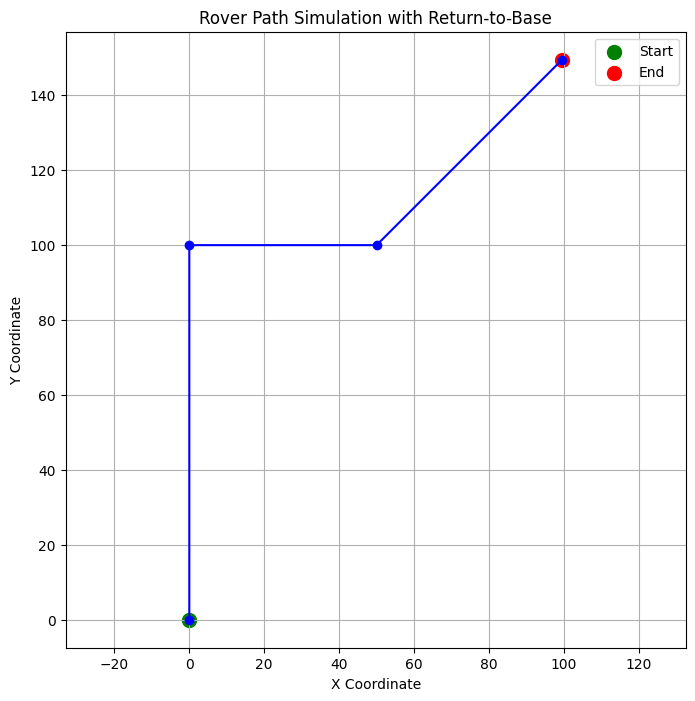

In [ ]:
import math
import matplotlib.pyplot as plt


obstacles = [
    {'x': 50, 'y': 50, 'radius': 10},
    {'x': 70, 'y': 80, 'radius': 5},

]

def heuristic(a, b):
    """Manhattan distance heuristic."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(start, goal, grid_size=5):
    """Simple grid-based A* implementation.

    The grid spans from (0,0) to (100,100) in steps of grid_size.
    A cell is marked 'passable' unless it is near an obstacle.
    """
    grid = {}
    for x in range(0, 101, grid_size):
        for y in range(0, 101, grid_size):
            grid[(x, y)] = {'passable': True}
            for obs in obstacles:
                # If the cell is within (obstacle radius + grid_size) of an obstacle, mark it non-passable.
                if math.hypot(x - obs['x'], y - obs['y']) < obs['radius'] + grid_size:
                    grid[(x, y)]['passable'] = False

    open_set = {start}
    came_from = {}
    g_score = {pos: float('inf') for pos in grid}
    g_score[start] = 0
    f_score = {pos: float('inf') for pos in grid}
    f_score[start] = heuristic(start, goal)

    while open_set:
        current = min(open_set, key=lambda pos: f_score[pos])
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        open_set.remove(current)
        for dx in [-grid_size, 0, grid_size]:
            for dy in [-grid_size, 0, grid_size]:
                # Skip the case where both dx and dy are zero.
                if dx == 0 and dy == 0:
                    continue
                neighbor = (current[0] + dx, current[1] + dy)
                if neighbor not in grid or not grid[neighbor]['passable']:
                    continue
                tentative_g = g_score[current] + heuristic(current, neighbor)
                if tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                    if neighbor not in open_set:
                        open_set.add(neighbor)
    return None

class Rover:
    def __init__(self, x=0.0, y=0.0, direction=0.0):
        """
        Initialize the rover.
          - (x, y): starting coordinates.
          - direction: initial heading in degrees (0° means facing east).
        """
        self.x = x
        self.y = y
        self.direction = direction
        self.path = [(self.x, self.y)]

    def move(self, distance, move_direction='forward'):
        """
        Move the rover a specified distance.
        For 'backward', the distance is treated as negative.
        """
        if move_direction == 'backward':
            distance = -distance
        rad = math.radians(self.direction)
        new_x = self.x + distance * math.sin(rad)
        new_y = self.y + distance * math.cos(rad)
        self.x = new_x
        self.y = new_y
        self.path.append((self.x, self.y))
        print(f"Moved {move_direction} {abs(distance)} units to ({self.x:.2f}, {self.y:.2f})")
        return True

    def turn(self, angle, turn_direction='clockwise'):
        """
        Adjust the rover's direction.
        Clockwise increases the angle; counterclockwise decreases it.
        """
        if turn_direction == 'clockwise':
            self.direction += angle
        elif turn_direction == 'counterclockwise':
            self.direction -= angle
        self.direction %= 360
        print(f"Turned {turn_direction} by {angle}° to {self.direction:.2f}°")

    def return_to_base(self):
        """
        Uses A* pathfinding to return to base (0, 0).
        The rover's current position is snapped to a grid of size 5.
        Then it follows the computed path point by point.
        """
        grid_size = 5
        start = (int(self.x // grid_size) * grid_size, int(self.y // grid_size) * grid_size)
        goal = (0, 0)
        print("Battery low. Pathfinding to base using A*...")
        path = astar(start, goal, grid_size=grid_size)
        if path is None:
            print("No path found to base.")
            return False
        else:
            print("Path found:", path)
            for point in path:
                dx = point[0] - self.x
                dy = point[1] - self.y

                if dx == 0 and dy == 0:
                    continue

                angle = math.degrees(math.atan2(dx, dy)) % 360
                self.direction = angle
                distance = math.hypot(dx, dy)
                self.move(distance, 'forward')
            return True

def simulate_rover(instructions):
    """
    Process a list of textual instructions and command the rover.
    Supported commands are 'move' and 'turn'.
    """
    rover = Rover()
    instruction_count = 0
    for line in instructions:
        instruction_count += 1
        parts = line.lower().strip().split()
        if not parts:
            continue
        if len(parts) <= 4:
            if parts[0] == 'move':
                try:
                    displacement = float(parts[1])
                except (ValueError, IndexError):
                    print(f"Invalid displacement value at instruction {instruction_count}")
                    break
                if parts[-1] == 'forward':
                    rover.move(displacement, 'forward')
                elif parts[-1] == 'backward':
                    rover.move(displacement, 'backward')
                else:
                    print(f"Unknown movement direction in instruction {instruction_count}")
            elif parts[0] == 'turn':
                try:
                    angle = int(parts[1])
                except (ValueError, IndexError):
                    print(f"Invalid angle value at instruction {instruction_count}")
                    break
                if parts[-1] == 'clockwise':
                    rover.turn(angle, 'clockwise')
                elif parts[-1] == 'counterclockwise':
                    rover.turn(angle, 'counterclockwise')
                else:
                    print(f"Unknown turn direction in instruction {instruction_count}")
            else:
                print(f"Unknown command in instruction {instruction_count}")
                break
        else:
            print(f"Unrecognized instruction format at instruction {instruction_count}")
            break
    return rover

# Example list of instructions.
instructions = [
    "move 100 forward",
    "turn 90 clockwise",
    "move 50 forward",
    "turn 45 counterclockwise",
    "move 70 forward"
]

# Simulate the rover based on instructions.
rover = simulate_rover(instructions)
rover.return_to_base()

# --- Visualization ---
xs = [pos[0] for pos in rover.path]
ys = [pos[1] for pos in rover.path]

plt.figure(figsize=(8, 8))
plt.plot(xs, ys, marker='o', linestyle='-', color='blue')
plt.title("Rover Path Simulation with Return-to-Base")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.axis('equal')
plt.scatter(xs[0], ys[0], color='green', s=100, label="Start")
plt.scatter(xs[-1], ys[-1], color='red', s=100, label="End")
plt.legend()
plt.show()


 safe mode.

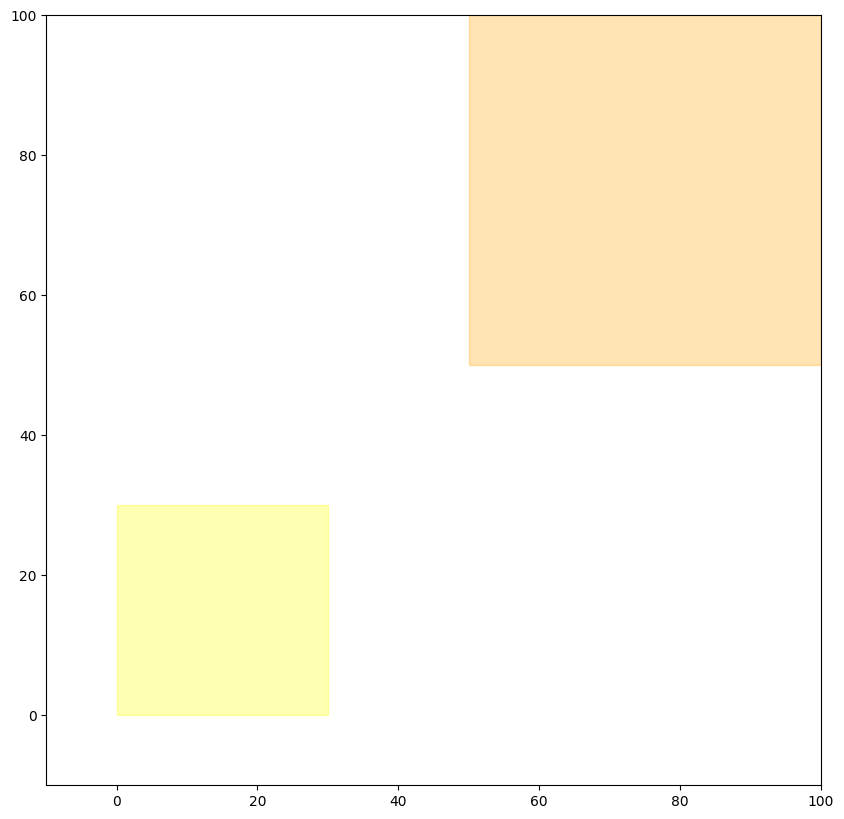

In [ ]:
# Update visualization code
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-10, 100)
ax.set_ylim(-10, 100)


for zone in terrain_zones:
    if zone['multiplier'] != 1.0:
        color = 'yellow' if zone['multiplier'] > 1 else 'orange'
        alpha = 0.3
        rect = plt.Rectangle((zone['x1'], zone['y1']),
                            zone['x2']-zone['x1'], zone['y2']-zone['y1'],
                            color=color, alpha=alpha)
        ax.add_patch(rect)

battery_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def update(frame):
    if frame < len(rover.path):
        current_xs = [pos[0] for pos in rover.path[:frame+1]]
        current_ys = [pos[1] for pos in rover.path[:frame+1]]
        path_line.set_data(current_xs, current_ys)
        battery_text.set_text(f'Battery: {rover.battery:.1f}%')
    return path_line, battery_text

Energy save mode.

Moved forward 50 units to (0.00, 50.00). Battery: 75.00%
Turned clockwise by 90° to 90.00°
Moved forward 60 units to (60.00, 50.00). Battery: 45.00%
Moved forward 80 units to (140.00, 50.00). Battery: 5.00%
Battery low! Returning to base.
Returning to base...
Reached base. Recharging battery...
Battery charged to 100%. Ready to move!
Moved forward 30 units to (30.00, 0.00). Battery: 85.00%


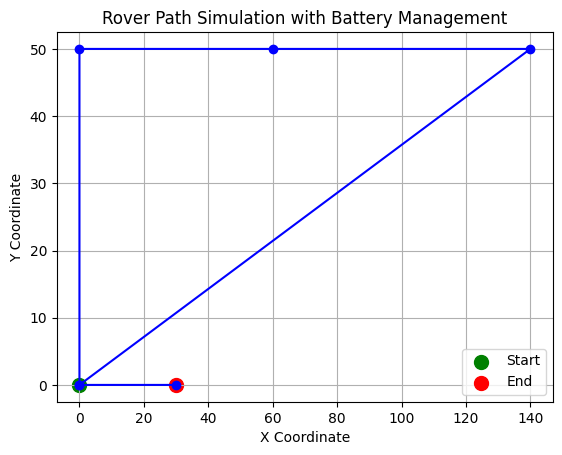

In [ ]:
import math
import matplotlib.pyplot as plt

class Rover:
    def __init__(self, x=0.0, y=0.0, direction=0.0, battery=100):
        self.x = x
        self.y = y
        self.direction = direction
        self.path = [(self.x, self.y)]
        self.battery = battery
        self.low_battery_threshold = 20

    def move(self, distance, move_direction='forward'):
        if self.battery <= 0:
            print("Battery depleted! Cannot move.")
            return False

        energy_required = distance * 0.5
        if self.battery - energy_required < 0:
            print("Not enough battery to move.")
            return False

        if move_direction == 'backward':
            distance = -distance
        rad = math.radians(self.direction)
        new_x = self.x + distance * math.sin(rad)
        new_y = self.y + distance * math.cos(rad)
        self.x = new_x
        self.y = new_y
        self.path.append((self.x, self.y))
        self.battery -= energy_required
        print(f"Moved {move_direction} {abs(distance)} units to ({self.x:.2f}, {self.y:.2f}). Battery: {self.battery:.2f}%")

        if self.battery <= self.low_battery_threshold:
            print("Battery low! Returning to base.")
            self.return_to_base()

        return True

    def turn(self, angle, turn_direction='clockwise'):
        if turn_direction == 'clockwise':
            self.direction += angle
        elif turn_direction == 'counterclockwise':
            self.direction -= angle
        self.direction %= 360
        print(f"Turned {turn_direction} by {angle}° to {self.direction:.2f}°")

    def return_to_base(self):
        print("Returning to base...")
        self.x, self.y = 0, 0
        self.path.append((self.x, self.y))
        print("Reached base. Recharging battery...")
        self.battery = 100

    def charge_battery(self, amount=50):
        self.battery = min(100, self.battery + amount)
        print(f"Battery charged to {self.battery}%. Ready to move!")

# Simulation
rover = Rover()
rover.move(50)
rover.turn(90, 'clockwise')
rover.move(60)
rover.move(80)
rover.charge_battery()
rover.move(30)

# Visualization
xs = [pos[0] for pos in rover.path]
ys = [pos[1] for pos in rover.path]
plt.plot(xs, ys, marker='o', linestyle='-', color='blue')
plt.title("Rover Path Simulation with Battery Management")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.scatter(xs[0], ys[0], color='green', s=100, label="Start")
plt.scatter(xs[-1], ys[-1], color='red', s=100, label="End")
plt.legend()
plt.show()


 Ultra mode.

Moved 10.0 units to (10.00, 10.00), Battery: 90.00%
Returning to base...
Moved to (10, 10)
Moved to (10, 5)
Moved to (10, 0)
Moved to (5, 0)
Moved to (0, 0)
Rover returned to base!


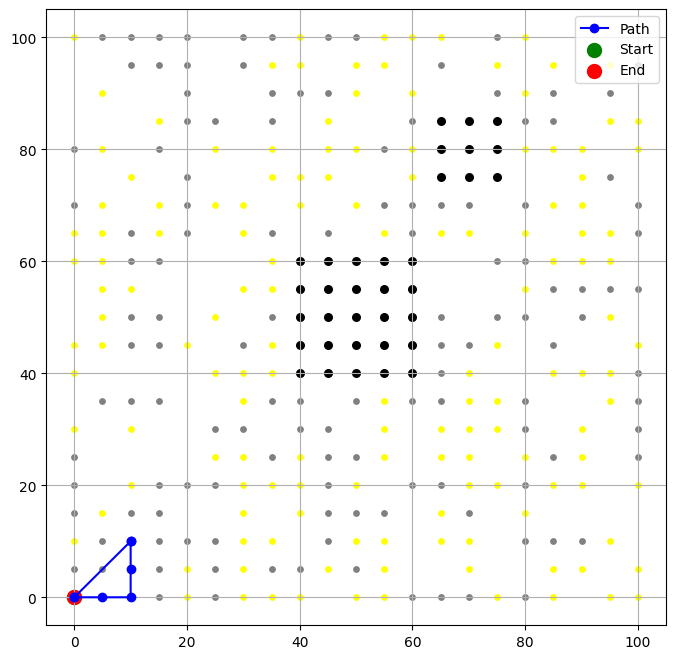

In [ ]:
import math
import matplotlib.pyplot as plt
import random


obstacles = [
    {'x': 50, 'y': 50, 'radius': 10},
    {'x': 70, 'y': 80, 'radius': 5},
]

# Define terrain types with speed multipliers.
terrain_map = {}
terrain_types = {
    'smooth': 1.0,
    'sandy': 0.7,
    'rocky': 0.5,
    'impassable': 0.0
}

def generate_terrain(grid_size=5, max_x=100, max_y=100):
    for x in range(0, max_x + 1, grid_size):
        for y in range(0, max_y + 1, grid_size):
            terrain_map[(x, y)] = random.choice(['smooth', 'sandy', 'rocky'])

    for obs in obstacles:
        for x in range(obs['x'] - obs['radius'], obs['x'] + obs['radius'] + 1, grid_size):
            for y in range(obs['y'] - obs['radius'], obs['y'] + obs['radius'] + 1, grid_size):
                if (x, y) in terrain_map:
                    terrain_map[(x, y)] = 'impassable'

generate_terrain()

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(start, goal, grid_size=5):
    open_set = {start}
    came_from = {}
    g_score = {pos: float('inf') for pos in terrain_map}
    g_score[start] = 0
    f_score = {pos: float('inf') for pos in terrain_map}
    f_score[start] = heuristic(start, goal)

    while open_set:
        current = min(open_set, key=lambda pos: f_score[pos])
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        open_set.remove(current)
        for dx, dy in [(-grid_size, 0), (grid_size, 0), (0, -grid_size), (0, grid_size)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if neighbor not in terrain_map or terrain_map[neighbor] == 'impassable':
                continue
            terrain_factor = terrain_types[terrain_map[neighbor]]
            if terrain_factor == 0:
                continue

            tentative_g = g_score[current] + heuristic(current, neighbor) / terrain_factor
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                open_set.add(neighbor)
    return None

class Rover:
    def __init__(self, x=0, y=0, battery=100):
        self.x = x
        self.y = y
        self.battery = battery
        self.path = [(self.x, self.y)]

    def move(self, distance):
        grid_size = 5
        next_x, next_y = int(self.x // grid_size) * grid_size, int(self.y // grid_size) * grid_size

        if (next_x, next_y) in terrain_map:
            terrain_factor = terrain_types[terrain_map[(next_x, next_y)]]
            if terrain_factor == 0:
                print("Impassable terrain! Cannot move.")
                return False

            adjusted_distance = distance * terrain_factor
            energy_cost = distance * (1 / terrain_factor)

            if self.battery < energy_cost:
                print("Battery too low to move!")
                return False

            self.battery -= energy_cost
            self.x += adjusted_distance
            self.y += adjusted_distance
            self.path.append((self.x, self.y))
            print(f"Moved {adjusted_distance} units to ({self.x:.2f}, {self.y:.2f}), Battery: {self.battery:.2f}%")
            return True
        return False

    def return_to_base(self):
        path = astar((int(self.x // 5) * 5, int(self.y // 5) * 5), (0, 0))
        if path is None:
            print("No path found to base.")
            return False

        print("Returning to base...")
        for point in path:
            self.x, self.y = point
            self.path.append((self.x, self.y))
            print(f"Moved to ({self.x}, {self.y})")
        print("Rover returned to base!")
        return True

def visualize():
    xs = [pos[0] for pos in rover.path]
    ys = [pos[1] for pos in rover.path]
    plt.figure(figsize=(8, 8))
    plt.plot(xs, ys, marker='o', linestyle='-', color='blue', label='Path')
    plt.scatter(xs[0], ys[0], color='green', s=100, label='Start')
    plt.scatter(xs[-1], ys[-1], color='red', s=100, label='End')
    for (x, y), t_type in terrain_map.items():
        if t_type == 'impassable':
            plt.scatter(x, y, color='black', s=30)
        elif t_type == 'sandy':
            plt.scatter(x, y, color='yellow', s=15)
        elif t_type == 'rocky':
            plt.scatter(x, y, color='gray', s=15)
    plt.grid(True)
    plt.legend()
    plt.show()

rover = Rover()
rover.move(10)
rover.return_to_base()
visualize()


 Reserch mode.

Moved to (0, 10) on sandy terrain. Energy: 98.57%
Turned to 0 degrees
Moved to (0, 20) on rocky terrain. Energy: 96.57%
Turned to 0 degrees
Moved to (0, 30) on smooth terrain. Energy: 95.57%
Turned to 0 degrees
Moved to (0, 40) on rocky terrain. Energy: 93.57%
Turned to 90 degrees
Moved to (10, 40) on rocky terrain. Energy: 91.57%
Turned to 90 degrees
Moved to (20, 40) on sandy terrain. Energy: 90.14%
Turned to 90 degrees
Moved to (30, 40) on rocky terrain. Energy: 88.14%
Turned to 90 degrees
Elements found: []


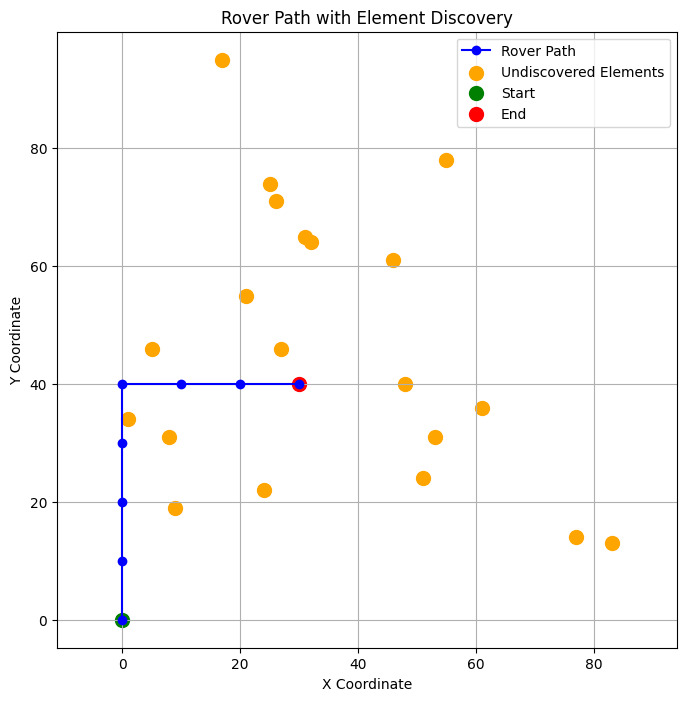

In [ ]:
import math
import random
import matplotlib.pyplot as plt


terrain_map = {}
for x in range(0, 101, 5):
    for y in range(0, 101, 5):
        terrain_type = random.choice(['smooth', 'rocky', 'sandy'])
        terrain_map[(x, y)] = {
            'type': terrain_type,
            'speed_multiplier': {'smooth': 1.0, 'rocky': 0.5, 'sandy': 0.7}[terrain_type]
        }


elements = ['Iron (Fe)', 'Silicon (Si)', 'Magnesium (Mg)', 'Sulfur (S)', 'Calcium (Ca)']
element_map = {}
for _ in range(20):
    x, y = random.randint(0, 100), random.randint(0, 100)
    element_map[(x, y)] = random.choice(elements)

class Rover:
    def __init__(self, x=0, y=0, direction=0):
        self.x = x
        self.y = y
        self.direction = direction
        self.path = [(self.x, self.y)]
        self.energy = 100
        self.found_elements = []

    def move(self, distance):
        rad = math.radians(self.direction)
        new_x = self.x + distance * math.sin(rad)
        new_y = self.y + distance * math.cos(rad)


        new_x = round(new_x / 5) * 5
        new_y = round(new_y / 5) * 5

        if (new_x, new_y) in terrain_map:
            terrain = terrain_map[(new_x, new_y)]
            speed_multiplier = terrain['speed_multiplier']
            energy_cost = (distance / speed_multiplier) * 0.1
            if self.energy >= energy_cost:
                self.energy -= energy_cost
                self.x = new_x
                self.y = new_y
                self.path.append((self.x, self.y))
                print(f"Moved to ({self.x}, {self.y}) on {terrain['type']} terrain. Energy: {self.energy:.2f}%")
                self.scan_for_elements()
            else:
                print("Not enough energy to move!")
        else:
            print("Impassable terrain detected!")

    def turn(self, angle):
        self.direction = (self.direction + angle) % 360
        print(f"Turned to {self.direction} degrees")

    def scan_for_elements(self):
        if (self.x, self.y) in element_map:
            element = element_map.pop((self.x, self.y))
            self.found_elements.append(element)
            print(f"Discovered {element} at ({self.x}, {self.y})!")

# Simulate rover movements
rover = Rover()
instructions = [
    (10, 0), (10, 0), (10, 0), (10, 90),
    (10, 0), (10, 0), (10, 0)
]

for dist, angle in instructions:
    rover.move(dist)
    rover.turn(angle)

print("Elements found:", rover.found_elements)

# Visualization
plt.figure(figsize=(8, 8))
xs, ys = zip(*rover.path)
plt.plot(xs, ys, marker='o', linestyle='-', color='blue', label='Rover Path')
plt.scatter(*zip(*element_map.keys()), color='orange', s=100, label='Undiscovered Elements')
plt.scatter(xs[0], ys[0], color='green', s=100, label='Start')
plt.scatter(xs[-1], ys[-1], color='red', s=100, label='End')
plt.legend()
plt.title("Rover Path with Element Discovery")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.axis('equal')
plt.show()
